<a href="https://colab.research.google.com/github/adriansanchezroy/SecWebsite/blob/main/9_Bases_de_donn%C3%A9es_relationnelles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Configuration
-------------------

Les cellules de cette section doivent être exécutées avant le reste du document. Si vous êtes déconnecté de l'engin d'exécution par Google Colab, il vous faudra exécuter cette section de nouveau.

Le code de cette section a pour fin :

* Créer la commande %%sql.

* Customiser la commande `%%javascript` pour permettre que le code fourni soit exécuté côté conteneur Colab.

* Installer MariaDB, les connecteurs, le noyau iPython pour MariaDB et mettre à jour la version de Node.js du conteneur Colab.

In [ ]:
"""
Le code de cette cellule ira installer les extensions,
les logiciels necéssaires et mettre à jour la version de Node.js
utilisée par Colab.
"""
!mkdir -p /content/cuisine /content/toronto

!pip3 install classroom-extensions
%load_ext classroom_extensions.node_install
%load_ext classroom_extensions.mariadb_install

%install_nodejs
%install_mariadb --password=passw0rd --sample_db

%load_ext classroom_extensions.web
%load_ext classroom_extensions.mariadb

# Base de données
----------


Stocker des données et récupérer des informations sont des besoins importants pour toutes les types et tailles d'entreprise.

 - Les données peuvent être des noms de personnes, des chiffres, des images, etc.

 - Lorsque ces données sont traitées et converties sur une forme significative et utile, elles deviennent des informations.

 - Un accès rapide aux informations est donc vital.


**Une base de données peut être définie comme une collection de données connexes à partir de laquelle les utilisateurs peuvent récupérer efficacement les informations souhaitées.**


**Un système de gestion de base de données (SGBD) est un ensemble intégré de programmes utilisés pour créer et pour maintenir une base de données.**

- L'objectif principal d'un SGBD est de fournir des interfaces et des APIs pour définir, stocker, récupérer et manipuler les données contenues dans la base de données.

**Généralement on appelle de base de données l'ensemble qui comporte le SGBD et une base de données elle-même.**


Dans ce cahier nous étudierons comment créer des bases de données relationnelles pour stocker des informations côté serveur.

 - Nous utiliserons le langage SQL pour manipuler les données.

 - Nous verrons comment mettre en oeuvre une API REST qui utilise les fonctionnalités explorées dans ce cahier.

## Base de données relationnelles

Une base de données relationnelle est structurée suivant les principes de l'algèbre relationnelle.

- Des données hétérogènes sont stockées dans des tables, ce qui permet d'établir des relations entre elles.

Dans les cahiers précédents nous avons représenté des données tabulaires sous forme de fichiers `.csv`.

- Les tables d'une base de données relationnelle suivent une représentation tabulaire qui ressemble à celle des fichiers `.csv`.

Une table contient des attributs qui sont représentés par des colonnes, et des enregistrements (lignes ou *n-uplets* de la table) qui définissent la cardinalité.

- Contrairement aux fichiers `.csv`, nous pouvons définir de contraintes et de relations entre les tables d'une base de données relationnelle.

**D'une manière générale, une base de données relationnelle est une collection d'une ou plusieurs tables.**

Regardons l'exemple d'une table:

| Id | Prenom | Nom | Adresse |
|-----|--------|------|---------|
| 6 | Bernardette | Chevalier | 1900 Princess St |
| 14 | Simonette | Pascal | 181 Carling Avenue |
| 24 | Aurore | Fosse | 4899 Rue De La Gare |
|29 | Horace | Petit | 1139 Papineau Avenue |
| 31 | Gérard | Lyon | 1403 Sherbrooke Ouest |
|33 | Inès | Duguay |  1625 Victoria Park Ave |
| 37 | Ferrand | Leon | 827 Albert Street |
| 47 | Laurent | Plamondon |  3466 Reserve St |

Les enregistrements ou entrées de la table suivent la même structure.

- Chaque enregistrement est constitué d'un identifiant, d'un prénom, d'un nom et d'une adresse.

- La première colonne est de type entier et les autres sont des chaînes de caractères.

## Structure d'une table

On peut conditionner les valeurs qu'une colonne peut avoir.

Généralement les valeurs possibles pour la valeur d'une colonne constituent son **domaine**.

- Chaque colonne a aussi un **type** et une **longueur** associés.

- Regardons par exemple les types des colonnes de la table de notre exemple:

|Nom de la colonne|Type|Longueur|
|-|-|-|
|Id | Nombre entier positif	| 4 |
|Prenom | Chaîne de caractères	| 20 |
|Nom | Chaîne de caractères	| 30 |
|Adresse | Chaîne de caractères	| 45 |

## Tables reliées

Une table peut avoir une **clé primaire** qui identifie de manière unique un enregistrement donné. Les tables peuvent aussi avoir des **clés étrangères** qui relient les enregistrements entre les tables.

- Une clé étrangère relie un enregistrement donné vers la clé primaire d'une autre table.

Les clés primaires et étrangères peuvent être utilisées pour créer des **jointures**, qui consistent à combiner des informations de plusieurs tables (par ex., via SQL). Les jointures produisent une seule table qui contient l'information de deux tables, ou plus, sans duplication.

<!--
|Code|Prix|Annee|Id_personne|
|----|----|-----|-----|
|1024| Meilleure écriture manuscrite| 2019 | 14|
|1072| Bureau le plus propre | 2020 | 6|
|1501| Le plus susceptible de gagner à la loterie | 2020 | 33 |
|1700 |Le plus silencieux | 2021| 47 | -->

**Exemple de tables reliées:**

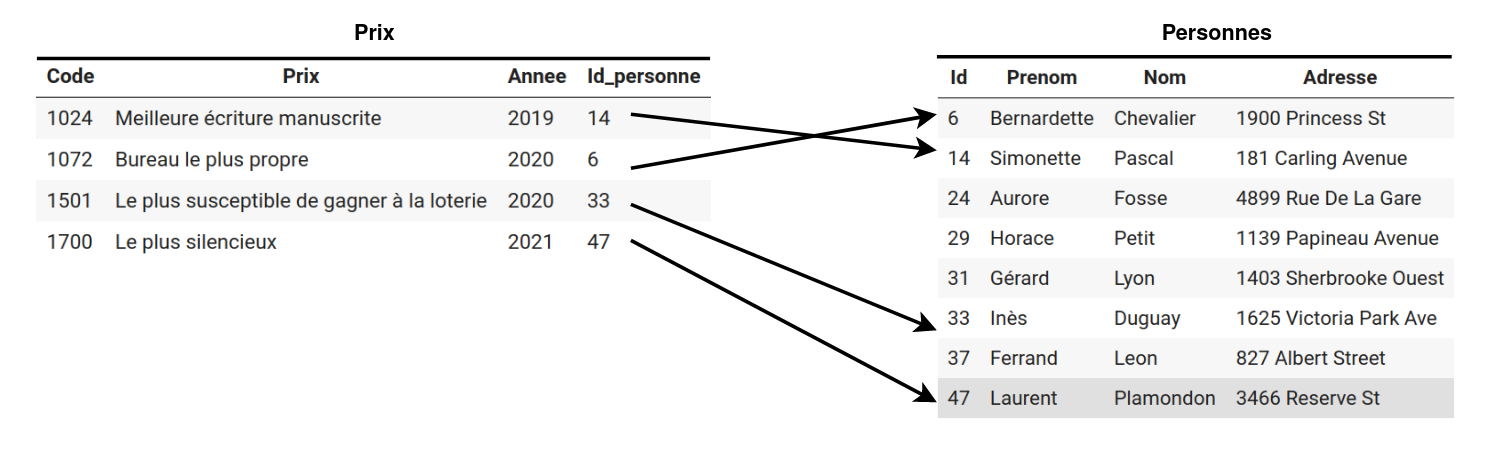

## Le langage SQL

Le SQL (*Structured Query Language*) est un langage qui permet à une application cliente de communiquer des instructions à une base de données. Il englobe un ensemble d'instructions essentielles pour :

* Définir la manière dont les données sont représentées.

* Effectuer des opérations d'écriture et de modification des données dans la base de données.

* Récupérer des données à partir de la base en utilisant des requêtes.

* Gérer les droits d'accès aux données.

Le langage SQL, initialement conçu pour interagir avec des bases de données relationnelles, trouve également son utilité dans l'interrogation et la manipulation de bases de données issues des technologies du *Big Data*.

# MariaDB
-------
Pour quelques exemples de ce cahier nous allons utiliser [MariaDB](https://mariadb.org/), un SGBD dont la gouvernance est assurée par la fondation MariaDB. Il s'agit d'un *fork* communautaire de [MySQL](https://www.mysql.com/) édité sous licence [GPL](https://www.gnu.org/licenses/gpl-3.0.fr.html).

Pour le prototypage et pour les tests des applications, il est tout à fait possible d'utiliser un SGBD plus simple, tel que [SQLite](https://www.sqlite.org/index.html). La plupart des commandes SQL utilisées dans ce cahier sont compatibles avec d'autres SGBD.

**Note:** Dans l'entrepôt git du cours, vous trouverez les commandes pour recréer la base de données sur SQLite ou MariaDB.

## Client MariaDB et la commande magique `%%sql`

Pour rendre l'interaction avec MariaDB plus facile, nous allons utiliser quelques fonctionnalités du [noyau MariaDB](https://github.com/MariaDB/mariadb_kernel) conçu pour Jupyter notebooks. Au lieu de simplement remplacer le noyau utilisé par Google Colab (iPython) par celui de MariaDB, la section de configuration a créé une commande magique `%%sql` qui enveloppe le client de ligne de commande de MariaDB (`mariadb`).

**Le contenu d'une cellule `%%sql` est fourni au client de ligne de commande (`mariadb`) pour exécution** :

In [ ]:
%%sql

SHOW DATABASES;

Le client enveloppé par la commande magique est déjà initialisé et connecté en tant qu'utilisateur racine (`root`).

**Remarque :** En pratique, vous devez créer vos propres comptes utilisateurs qui n'auront accès qu'aux tables de votre base de données.

## Consulter des bases de données et des tables

On obtient la liste des bases de données stockées dans le serveur avec l'instruction:

In [ ]:
%%sql

SHOW DATABASES;

Nous pouvons choisir/nous connecter à une de bases de données à l'aide de l'instruction `USE`:

In [ ]:
%%sql

USE nation;

Une fois connecté à une base de données, nous pouvons lister les tables avec l'instruction ci-dessous:

In [ ]:
%%sql

SHOW TABLES;

Pour afficher les colonnes d'une table, on utilise `DESC` suivi du nom d'une table:

In [ ]:
%%sql

DESC countries;

Le contenu d'une table est affiché à l'aide de la commande `SELECT`:

In [ ]:
%%sql

SELECT * FROM continents;

In [ ]:
%%sql

SELECT * FROM continents LIMIT 3;

Nous pouvons choisir les colonnes à afficher et spécifier des contraintes et d'autres instructions:

In [ ]:
%%sql

SELECT name, country_code2 from countries WHERE name LIKE 'Ca%' ORDER BY name DESC;

# Activité en classe
------------

## Jointure des `countries` et `regions`

Étant données les descriptions des tables `countries` et `regions`, vous devez créer une instruction SQL pour récupérer la liste des pays qui font partie de la region `South America`:

<!--
select c.* from countries c
join regions r on c.region_id = r.region_id
where r.name = 'South America';
-->

In [ ]:
%%sql

USE nation;
DESC countries;

In [ ]:
%%sql

DESC regions;

In [ ]:
%%sql

-- Placez la réponse ici

select c.* from countries c
join regions r on c.region_id = r.region_id
where r.name = 'South America';

## Pays où le français est parlé

Étant données les descriptions des tables `countries`, `languages` et `country_languages` ci-dessous, vous devez créer une instruction SQL pour récupérer la liste des pays où le Français est parlé:

<!--
select c.* from countries c
join country_languages cl on c.country_id = cl.country_id
join languages l on l.language_id = cl.language_id
where l.language = 'French';
-->

In [ ]:
%%sql

USE nation;
DESC countries;

In [ ]:
%%sql

DESC languages;

In [ ]:
%%sql

DESC country_languages;

In [ ]:
%%sql

-- Place votre réponse ici...

select c.* from countries c
join country_languages cl on c.country_id = cl.country_id
join languages l on l.language_id = cl.language_id
where l.language = 'French';

## Création d'une base de données et des tables

Nous allons maintenant créer une base de données d'exemple et quelques tables.
Pour les colonnes des tables, nous utilisons des types simples, tels que des entiers, des chaînes de caractères et des textes.

Notre base de données s'appellera `cuisine` et contiendra des informations sur quelques plats, tels que les ingrédients nécessaires et comment les préparer. Nous ajouterons quelques fonctionnalités à ce projet le long des prochains cours.

La figure ci-dessous illustre le schéma de la base de données:


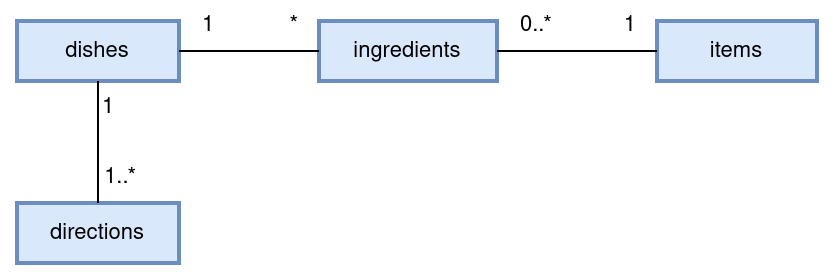

Création de la base de données:

In [ ]:
%%sql

CREATE DATABASE IF NOT EXISTS cuisine;
USE cuisine;

Création de la table `dishes`

* La clé primaire de la table est un nombre entier. Cette valeur doit être unique pour chaque enregistrement de la table.

In [ ]:
%%sql

CREATE TABLE IF NOT EXISTS dishes (
  id     INTEGER PRIMARY KEY,
  name   VARCHAR(80) NOT NULL,
  veg    BOOLEAN NOT NULL,
  photo  VARCHAR(200) NOT NULL
);

Création de la table `items` qui représente les produits ou les "composants" des plats.

* Il ne s'agit encore d'un ingrédient spécifique, mais simplement d'un produit qui peut être utilisé dans la conception d'un plat.

In [ ]:
%%sql

CREATE TABLE IF NOT EXISTS items (
  id    INTEGER PRIMARY KEY,
  name  VARCHAR(80) NOT NULL
);

Création de la table `ingredients` qui relie les items et les plats.

* Une entrée de la table `ingredients` représente la quantité d'un `item` dans une recette.

In [ ]:
%%sql

CREATE TABLE IF NOT EXISTS ingredients (
  dish_id   INTEGER NOT NULL REFERENCES dishes(id),
  item_id   INTEGER NOT NULL REFERENCES items(id),
  quantity  FLOAT DEFAULT 1,
  unit      VARCHAR(30) NOT NULL
);

Création de la table `directions` qui contient les pas necéssaires pour preparer un plat.

In [ ]:
%%sql

CREATE TABLE IF NOT EXISTS directions (
  dish_id   INTEGER NOT NULL REFERENCES dishes(id),
  step_id   INTEGER NOT NULL,
  description   TINYTEXT,
  PRIMARY KEY (dish_id, step_id)
);

Pour lister les tables dans la base de données:

In [ ]:
%%sql

SHOW TABLES;

## Ajouter des enregistrements dans les tables

Nous allons maintenant insérer des entrées dans les tables créées.
  
* Pour insérer des entrées nous utilisons l'instruction SQL: `INSERT INTO table VALUE (valeurs...)`.

Ajout d'éléments dans la table `items`:

In [ ]:
%%sql

INSERT INTO items VALUES
(1, 'fettucine'), (2, 'beurre'), (3, 'bacon'),
(4, 'ail'), (5, 'poivre noir'), (6, 'crème liquide'),
(7, 'oeufs'), (8, 'parmesan râpé'), (9, 'pecorino romano'),
(10, 'ciboulette hachée'), (11, 'pignons de pin grillé'),
(12, 'basilique'), (13, 'huile d\'olive'), (14, 'spaguetti');

Ajout d'éléments dans la table `dish`:

In [ ]:
%%sql

INSERT INTO dishes VALUES
(1, 'Fettucine carbonara', false, 'https://img.taste.com.au/yeaSrH46/w643-h428-cfill-q90/taste/2016/11/creamy-fettuccine-carbonara-105940-1.jpeg'),
(2, 'Spaghettis au pesto', true, 'https://assets.afcdn.com/recipe/20150828/19205_w768h583c1cx2048cy3072.webp'),
(3, 'Fettucine alfredo', true, 'https://www.modernhoney.com/wp-content/uploads/2018/08/Fettuccine-Alfredo-Recipe-1.jpg');

Ajout d'éléments dans la table `ingredients`:

In [ ]:
%%sql

INSERT INTO ingredients VALUES
(1, 1, 500, 'g'), (1, 2, 60, 'g'), (1, 3, 6, 'tranche'),
(1, 4, 1, 'gousse'), (1, 5, 0.5, 'c. à c.'),
(1, 6, 300, 'ml'), (1, 7, 2, 'un.'),
(1, 8, 40, 'g'), (1, 9, 40, 'g'), (1, 10, 2, 'c. à c.'),
(2, 4, 2, 'gousse'), (2, 11, 50, 'g'),
(2, 8, 40, 'g'), (2, 12, 4, 'botte'),
(2, 13, 125, 'ml'), (2, 14, 500, 'g'),
(3, 1, 500, 'g'), (3, 2, 80, 'g'),
(3, 6, 300, 'ml'), (3, 8, 40, 'g');

Ajout d'éléments dans la table `directions`:

In [ ]:
%%sql

INSERT INTO directions VALUES
(1, 1, "Faites cuire les pâtes dans une grande casserole d'eau bouillante, puis égouttez-les."),
(1, 2, "Pendant ce temps, faites fondre le beurre dans une poêle et faites revenir le bacon 5 minutes."),
(1, 3, "Ajoutez l'ail, le poivre et la crème liquide dans la poêle. Laissez frémir à découvert jusqu'à ce que la sauce réduise de moitié. Retirez la poêle du feu pour incorporer les oeufs et les fromages."),
(1, 4, "Mélangez les pâtes avec la sauce. Parsemer de ciboulette avant de servir."),
(2, 1, "Pour réaliser le pesto, avec un mixeur ou un robot, mixez l'ail, les pignons, le parmesan râpé et le basilic jusqu'à obtention d'un mélange presque lisse."),
(2, 2, "Versez progressivement l'huile d'olive en filet, en mixant, jusqu'à ce que le mélange ait épaissi."),
(2, 3, "Faites cuire les pâtes dans une grande casserole d'eau bouillante, Égouttez-les et réservez 60 ml de l'eau de cuisson."),
(2, 4, "Mélangez les spaghettis, le pesto et l'eau de cuisson réservée dans un grand saladier."),
(3, 1, "Faites cuire les pâtes dans une grande casserole d'eau bouillante salée, puis égouttes-les."),
(3, 2, "Faites fondre le beurre dans une poêle. Versez la crème liquide, portez à ébullition puis baissez le feu. Laisser mijoter 5 minutes sans couvrir, jusqu'à ce que la sauce ait réduit de moitié."),
(3, 3, "Ajoutez le parmesan et remuez pendant 2 minutes pour que le fromage soit bien incorporé."),
(3, 4, "Servez les fettucine avec la sauce et parsemer d'un peu de parmesan râpé, si vous le souhaitez.");

## Jointures entre plusieurs tables

Lorsque l'on souhaite récupérer de manière cohérente des informations contenues dans plusieurs tables, nous devons utiliser l'opérateur de jointure. Par exemple, pour obtenir la liste des ingrédients pour **Fettuccine Alfredo :**

In [ ]:
%%sql

SELECT quantity, unit, name
FROM ingredients JOIN items ON ingredients.item_id = items.id
WHERE ingredients.dish_id = 3;

On peut également effectuer la jointure en utilisant des conditions spécifiées après `WHERE` :

In [ ]:
%%sql

SELECT quantity, unit, items.name
FROM ingredients, items, dishes
WHERE ingredients.dish_id = dishes.id AND
ingredients.item_id = items.id
AND dishes.name LIKE "Spaghettis%";

# Application Cuisine GTI525 - MariaDB et Express.js
---------

Nous allons développer une application Express.js qui fournira une API pour la consultation des informations des plats stockées dans notre base de données. Pour ce project nous utiliserons des modules ECMAScript. Pour commencer, nous installerons les modules nécessaires :

In [ ]:
"""
Pour modifier le répertoire de travail de Colab et
créer quelques dossiers pour mieux structurer le projet.
"""
%cd /content/cuisine
!mkdir -p models controllers routers config util

/content/cuisine


In [ ]:
""" Pour initialiser le projet et installer les paquets necessaires. """
!npm init -y
!npm install mariadb dotenv express --save

Wrote to /content/cuisine/package.json:

{
  "name": "cuisine",
  "version": "1.0.0",
  "description": "",
  "main": "index.js",
  "scripts": {
    "test": "echo \"Error: no test specified\" && exit 1"
  },
  "keywords": [],
  "author": "",
  "license": "ISC"
}



added 69 packages, and audited 70 packages in 3s

12 packages are looking for funding
  run `npm fund` for details

found 0 vulnerabilities
npm notice 
npm notice New major version of npm available! 9.8.1 -> 10.2.4
npm notice Changelog: https://github.com/npm/cli/releases/tag/v10.2.4
npm notice Run npm install -g npm@10.2.4 to update!
npm notice 


## Connecter à MariaDB

Pour connecter à MariaDB et obtenir les données nécessaires à partir de Node.js, nous allons utiliser le [connecteur de MariaDB](https://mariadb.com/kb/en/getting-started-with-the-nodejs-connector/). Le connecteur permet d'exécuter des instructions SQL pour récupérer les données. Vous pourriez envisager d'utiliser une bibliothèque ORM, telle que [Prisma](https://www.prisma.io/) ou [Sequelize](https://sequelize.org).

Nous utiliserons [`dotenv`](https://www.npmjs.com/package/dotenv) pour eviter d'ajouter le nom d'utilisateur, le mot de passe et le nom de la base de données dans des fichiers `.js`:

In [ ]:
%%writefile .env
MARIADB_DATABASE=cuisine
MARIADB_USER=root
MARIADB_PASSWORD=passw0rd
MARIADB_HOST=localhost

Writing .env


L'exemple ci-dessous se connecte à la base de données `cuisine` et liste les informations des plats disponibles.

In [ ]:
%%javascript --target=node --filename=list_dishes.mjs

import mariadb from 'mariadb';
import dotenv from 'dotenv';

// dotenv essayera de charger un fichier appelé .env
const result = dotenv.config();
if (result.error) {
    console.error("Erreur de lecture du fichier .env", result.error);
    process.exit(-1);
}

/*
dotenv créé des variables d'environnement
selon les valeurs spécifiés dans le fichier .env
*/
const pool =  mariadb.createPool({
    host: process.env.MARIADB_HOST,
    user: process.env.MARIADB_USER,
    password: process.env.MARIADB_PASSWORD,
    database: process.env.MARIADB_DATABASE,
    connectionLimit: 5
});


async function query(sqlStmt, ...values) {
    let connection;
    try {
        // Pour obtenir une connexion
        connection = await pool.getConnection();
        return await connection.query(sqlStmt, values);
    } catch (error) {
        throw error;
    } finally {
        await connection?.end();
    }
}

// Pour consulter la base de données
try {
    const results = await query('SELECT * FROM dishes');
    console.log(results);
} catch (error) {
    console.error(error.message);
} finally {
    pool?.end();
}

[
{
id: 1,
name: 'Fettucine carbonara',
veg: 0,
photo: 'https://img.taste.com.au/yeaSrH46/w643-h428-cfill-q90/taste/2016/11/creamy-fettuccine-carbonara-105940-1.jpeg'
},
{
id: 2,
name: 'Spaghettis au pesto',
veg: 1,
photo: 'https://assets.afcdn.com/recipe/20150828/19205_w768h583c1cx2048cy3072.webp'
},
{
id: 3,
name: 'Fettucine alfredo',
veg: 1,
photo: 'https://www.modernhoney.com/wp-content/uploads/2018/08/Fettuccine-Alfredo-Recipe-1.jpg'
}
]


### Un pilote (*driver*) de connexion

Notre API aura un module responsable pour gérer un *pool* de connexions avec la base de données MariaDB et pour exécuter les requêtes des modèles. Ce module se trouve dans `config/db.mjs`.

In [ ]:
%%javascript --target=disk --filename=config/db.mjs

import mariadb from 'mariadb';
import dotenv from 'dotenv';
dotenv.config();

class MariaDBPool {
    constructor() {
        this.pool = mariadb.createPool({
            host: process.env.MARIADB_HOST,
            user: process.env.MARIADB_USER,
            password: process.env.MARIADB_PASSWORD,
            database: process.env.MARIADB_DATABASE,
            connectionLimit: 5
        });
    }

    async query(sqlStmt, ...values) {
        let connection;
        try {
            connection = await this.pool.getConnection();
            return await connection.query(sqlStmt, values);
        } catch (error) {
            throw error;
        } finally {
            await connection?.end();
        }
    }
}

const instance = new MariaDBPool();
export default instance;

### Le modèle

Nous allons ensuite créer un modèle pour interagir avec la base de données et exposer les fonctionnalités dont notre contrôleur aura besoin. Tel qu'on l'a expliqué tout à l'heure, vous pourriez envisager d'utiliser une bibliothèque ORM (par ex., [Prisma](https://www.prisma.io/) ou [Sequelize](https://sequelize.org)).

In [ ]:
%%javascript --target=disk --filename=models/dishes.mjs

import db from '../config/db.mjs';

class DishModel {

    async allDishes() {
        return await db.query("SELECT * FROM dishes");
    }

    async dishById(dishId) {
        return await db.query("SELECT * FROM dishes WHERE id = ?", dishId);
    }

    async ingredients(dishId) {
        const sqlStmt = `SELECT item_id, quantity, unit, name FROM ingredients
                    INNER JOIN items ON ingredients.item_id = items.id
                    WHERE ingredients.dish_id = ?`;
        return await db.query(sqlStmt, dishId);
    }

    async directions(dishId) {
        const sqlStmt = `SELECT step_id, description
                FROM directions WHERE dish_id = ? ORDER BY step_id`;
        return await db.query(sqlStmt, dishId);
    }
}

export default new DishModel();

### Le contrôleur

Le contrôleur utilisera le modèle pour répondre à des requêtes vers les routes definies dans la configuration d'`Express.js`:

In [ ]:
%%javascript --target=disk --filename=controllers/dishes.mjs

import model from '../models/dishes.mjs';
import { Response } from '../util/response.mjs';

class DishController {
    async allDishes(req, res){
        try {
            const results = await model.allDishes();
            res.json(Response.ok(results));
        } catch (error) {
            res.status(505).json(Response.error(505, error.message));
        }
    }

    async dishById(req, res) {
        try {
            const dishId = req.params.dishId;
            const results = await model.dishById(dishId);
            if (results.length) {
                res.json(Response.ok(results));
            } else {
                res.status(404).json(Response.error(404, "Plat pas trouvé."));
            }
        } catch (error) {
            res.status(505).json(Response.error(505, error.message));
        }
    }

    async ingredients(req, res) {
        try {
            const dishId = req.params.dishId;
            const results = await model.ingredients(dishId);
            if (results.length) {
                res.json(Response.ok(results));
            } else {
                res.status(404).json(Response.error(404, "Plat pas trouvé."));
            }
        } catch (error) {
            res.status(505).json(Response.error(505, error.message));
        }
    }

    async directions(req, res) {
        try {
            const dishId = req.params.dishId;
            const results = await model.directions(dishId);
            if (results.length) {
                res.json(Response.ok(results));
            } else {
                res.status(404).json(Response.error(404, "Plat pas trouvé."));
            }
        } catch (error) {
            res.status(505).json(Response.error(505, error.message));
        }
    }
}

export default new DishController();

Le contrôleur utilise la classe utilitaire `Response`, introduite dans le cours antérieur, pour formater les réponses envoyées par l'API.

In [ ]:
%%javascript --target=disk --filename=util/response.mjs

export class Response {
    constructor(code, message, data) {
        this.code = code;
        this.message = message;
        this.data = data;
    }

    static ok(data) {
        return new Response(200, "OK", data);
    }

    static error(code, message, data) {
        return new Response(code, message, data);
    }

    static serverError(message) {
        return new Response(505, message);
    }
}

### Le routeur

Le routeur détermine quelles actions du contrôleur doivent être appelés pour répondre à une requête spécifique.

In [ ]:
%%javascript --target=disk --filename=routers/dishes.mjs

import { Router } from 'express';
import controller from '../controllers/dishes.mjs';

const router = Router();

router.route("/")
    .get(controller.allDishes);

router.route("/:dishId")
    .get(controller.dishById);

router.route("/:dishId/ingredients")
    .get(controller.ingredients);

router.route("/:dishId/directions")
    .get(controller.directions);

export default router;

### L'Application Express

Maintenant nous pouvons relier tous les composants et créer le script qui ira démarrer l'application:

In [ ]:
%%javascript --target=node --filename=index.mjs --port=3000

import express from 'express';
import dishRouter from './routers/dishes.mjs';

const app = express();
const PORT = process.env.NODE_PORT || 3000;

app.use("/api/dishes", dishRouter);

app.listen(PORT, () => console.log(`Le serveur écoute sur le port ${PORT}`));

Le serveur écoute sur le port 3000


## Utiliser curl pour tester l'API

Pour consulter tous les plats:

In [ ]:
!curl -s http://localhost:3000/api/dishes/ | json_pp

{
   "code" : 200,
   "data" : [
      {
         "id" : 1,
         "name" : "Fettucine carbonara",
         "photo" : "https://img.taste.com.au/yeaSrH46/w643-h428-cfill-q90/taste/2016/11/creamy-fettuccine-carbonara-105940-1.jpeg",
         "veg" : 0
      },
      {
         "id" : 2,
         "name" : "Spaghettis au pesto",
         "photo" : "https://assets.afcdn.com/recipe/20150828/19205_w768h583c1cx2048cy3072.webp",
         "veg" : 1
      },
      {
         "id" : 3,
         "name" : "Fettucine alfredo",
         "photo" : "https://www.modernhoney.com/wp-content/uploads/2018/08/Fettuccine-Alfredo-Recipe-1.jpg",
         "veg" : 1
      }
   ],
   "message" : "OK"
}


Pour consulter le plat dont l'identifiant est `1`:

In [ ]:
!curl -s http://localhost:3000/api/dishes/1 | json_pp

{
   "code" : 200,
   "data" : [
      {
         "id" : 1,
         "name" : "Fettucine carbonara",
         "photo" : "https://img.taste.com.au/yeaSrH46/w643-h428-cfill-q90/taste/2016/11/creamy-fettuccine-carbonara-105940-1.jpeg",
         "veg" : 0
      }
   ],
   "message" : "OK"
}


Pour consulter les ingrédients nécessaires pour préparer le plat dont l'identifiant est `2`:

In [ ]:
!curl -s http://localhost:3000/api/dishes/2/ingredients | json_pp

{
   "code" : 200,
   "data" : [
      {
         "item_id" : 4,
         "name" : "ail",
         "quantity" : 2,
         "unit" : "gousse"
      },
      {
         "item_id" : 11,
         "name" : "pignons de pin grillé",
         "quantity" : 50,
         "unit" : "g"
      },
      {
         "item_id" : 8,
         "name" : "parmesan râpé",
         "quantity" : 40,
         "unit" : "g"
      },
      {
         "item_id" : 12,
         "name" : "basilique",
         "quantity" : 4,
         "unit" : "botte"
      },
      {
         "item_id" : 13,
         "name" : "huile d'olive",
         "quantity" : 125,
         "unit" : "ml"
      },
      {
         "item_id" : 14,
         "name" : "spaguetti",
         "quantity" : 500,
         "unit" : "g"
      }
   ],
   "message" : "OK"
}


Pour consulter le mode de préparation du plat dont l'identifiant est `3`:

In [ ]:
!curl -s http://localhost:3000/api/dishes/3/directions | json_pp

{
   "code" : 200,
   "data" : [
      {
         "description" : "Faites cuire les pâtes dans une grande casserole d'eau bouillante salée, puis égouttes-les.",
         "step_id" : 1
      },
      {
         "description" : "Faites fondre le beurre dans une poêle. Versez la crème liquide, portez à ébullition puis baissez le feu. Laisser mijoter 5 minutes sans couvrir, jusqu'à ce que la sauce ait réduit de moitié.",
         "step_id" : 2
      },
      {
         "description" : "Ajoutez le parmesan et remuez pendant 2 minutes pour que le fromage soit bien incorporé.",
         "step_id" : 3
      },
      {
         "description" : "Servez les fettucine avec la sauce et parsemer d'un peu de parmesan râpé, si vous le souhaitez.",
         "step_id" : 4
      }
   ],
   "message" : "OK"
}


## Exemple d'application frontale

L'[entrepôt git du cours](https://github.com/assuncaomarcos/gti525-examples) contient un exemple d'application frontale basé sur des gabarits EJS et qui ressemble à la capture d'écran ci-dessous:

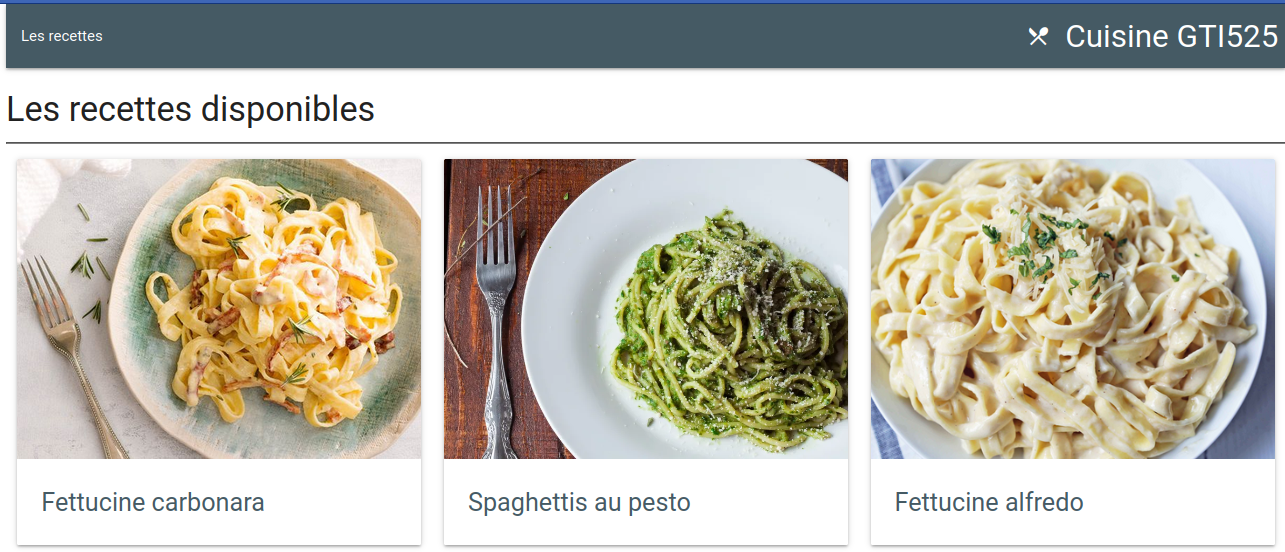

## Accéder au serveur via le Proxy Colab (Non disponible sur Firefox)

Pour obtenir l'adresse du proxy Colab pour accéder à l'application :

In [ ]:
from google.colab.output import eval_js
print("Lien pour l'application frontale:")
print(eval_js("google.colab.kernel.proxyPort(3000)"))

# Activité en classe
-----------

Implémentez la fonctionnalité nécessaire pour que l'API REST puisse répondre à des requêtes pour la ressource `/v1/items`. Les réponse doivent retourner la liste d'items disponibles qui peuvent être utilisés comme ingrédients pour les plats.

In [ ]:
%%javascript --target=disk --filename=models/items.mjs
import db from '../config/db.mjs';

// Complétez le modèle...
class ItemsModel {

    async allItems() {
        return await db.query("SELECT * FROM items");
    }

    async itemById(itemId) {
        return await db.query("SELECT * FROM items WHERE id = ?", itemId);
    }
}

export default new ItemsModel();

In [ ]:
%%javascript --target=disk --filename=controllers/items.mjs

import model from '../models/items.mjs';
import { Response } from '../util/response.mjs';

// Complétez le contrôleur...

class ItemController {
    async allItems(req, res) {
        try {
            const results = await model.allItems();
            res.json(Response.ok(results));
        } catch (error) {
            res.status(505).json(Response.error(505, error.message));
        }
    }

    async itemById(req, res) {
        try {
            const itemId = req.params.itemId;
            const results = await model.itemById(itemId);
            if (results.length) {
                res.json(Response.ok(results));
            } else {
                res.status(404).json(Response.error(404, "Item pas trouvé."));
            }
        } catch (error) {
            res.status(505).json(Response.error(505, error.message));
        }
    }
}

export default new ItemController();

In [ ]:
%%javascript --target=disk --filename=routers/items.mjs

import { Router } from 'express';
import controller from '../controllers/items.mjs';

const router = Router();

router.route("/").get(controller.allItems);
router.route("/:itemId").get(controller.itemById);

export default router;

In [ ]:
%%javascript --target=node --filename=index.mjs --port=3000

import express from 'express';
import dishRouter from './routers/dishes.mjs';
import itemRouter from './routers/items.mjs';

const app = express();
const PORT = process.env.NODE_PORT || 3000;


app.use("/api/dishes", dishRouter);
app.use("/api/items", itemRouter);

app.listen(PORT, () => console.log(`Le serveur écoute sur le port ${PORT}`));

Le serveur écoute sur le port 3000


In [ ]:
!curl -s http://localhost:3000/api/items | json_pp

{
   "code" : 200,
   "data" : [
      {
         "id" : 1,
         "name" : "fettucine"
      },
      {
         "id" : 2,
         "name" : "beurre"
      },
      {
         "id" : 3,
         "name" : "bacon"
      },
      {
         "id" : 4,
         "name" : "ail"
      },
      {
         "id" : 5,
         "name" : "poivre noir"
      },
      {
         "id" : 6,
         "name" : "crème liquide"
      },
      {
         "id" : 7,
         "name" : "oeufs"
      },
      {
         "id" : 8,
         "name" : "parmesan râpé"
      },
      {
         "id" : 9,
         "name" : "pecorino romano"
      },
      {
         "id" : 10,
         "name" : "ciboulette hachée"
      },
      {
         "id" : 11,
         "name" : "pignons de pin grillé"
      },
      {
         "id" : 12,
         "name" : "basilique"
      },
      {
         "id" : 13,
         "name" : "huile d'olive"
      },
      {
         "id" : 14,
         "name" : "spaguetti"
      }
   ],
   "messag

In [ ]:
!curl -s http://localhost:3000/api/items/13 | json_pp

{
   "code" : 200,
   "data" : [
      {
         "id" : 13,
         "name" : "huile d'olive"
      }
   ],
   "message" : "OK"
}


# Informations Géospatiales dans MariaDB
-------------

Cette section propose quelques exemples illustrant l'utilisation de MariaDB pour stocker et manipuler des données géospatiales. Nous ferons usage de données géographiques de la ville de Toronto disponibles [dans un dépôt Git sur GitHub](https://github.com/jasonicarter/toronto-geojson).

In [ ]:
"""Pour changer le dossier de travail de Colab"""
%cd /content/toronto

/content/toronto


Pour télécharger le fichier GeoJSON avec les coordonnées des arrondissements de Toronto:

In [ ]:
!wget https://raw.githubusercontent.com/jasonicarter/toronto-geojson/master/toronto_crs84.geojson -O toronto_crs84.geojson

--2023-11-16 01:19:19--  https://raw.githubusercontent.com/jasonicarter/toronto-geojson/master/toronto_crs84.geojson
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1972831 (1.9M) [text/plain]
Saving to: ‘toronto_crs84.geojson’

toronto_crs84.geojs 100%[===================>]   1.88M  --.-KB/s    in 0.07s   

2023-11-16 01:19:20 (26.7 MB/s) - ‘toronto_crs84.geojson’ saved [1972831/1972831]



Les commandes suivantes sont nécessaires pour créer la base de données `toronto` et la table `neighborhoods` qui contiendra les informations géospatiales.

In [ ]:
%%sql
CREATE DATABASE IF NOT EXISTS toronto;

In [ ]:
%%sql
USE toronto;

In [ ]:
%%sql
CREATE TABLE neighborhoods (
  id INT AUTO_INCREMENT PRIMARY KEY,
  name VARCHAR(150),
  area GEOMETRY
);

Pour initialiser le projet et installer les paquets nécessaires :

In [ ]:
!npm init -y
!npm install mariadb dotenv --save

Wrote to /content/toronto/package.json:

{
  "name": "toronto",
  "version": "1.0.0",
  "description": "",
  "main": "index.js",
  "scripts": {
    "test": "echo \"Error: no test specified\" && exit 1"
  },
  "keywords": [],
  "author": "",
  "license": "ISC"
}



added 11 packages, and audited 12 packages in 1s

1 package is looking for funding
  run `npm fund` for details

found 0 vulnerabilities


Le fichier `.env` de configuration du projet :

In [ ]:
%%writefile .env
MARIADB_DATABASE=toronto
MARIADB_USER=root
MARIADB_PASSWORD=passw0rd
MARIADB_HOST=localhost

Writing .env


Le module ci-dessous effectue la lecture du fichier GeoJSON `toronto_crs84.geojson` et le parse en un objet GeoJSON. Ensuite, il:

- Établit une connexion à la base de données MariaDB

- Supprime le contenu actuel de la table 'neighborhoods'

- Parcourt les caractéristiques (*features*) du GeoJSON, extrait le nom et la géométrie de chaque feature, et insère ces données dans la table 'neighborhoods' de la base de données.


In [ ]:
%%javascript --target=node --filename=import_data.mjs

import fs from 'node:fs';
import mariadb from 'mariadb';
import dotenv from 'dotenv';

const result = dotenv.config();
if (result.error) {
    console.error("Erreur de lecture du fichier .env", result.error);
    process.exit(-1);
}

const geoJSON = await fs.readFileSync('./toronto_crs84.geojson', 'utf8');
const geoObj = JSON.parse(geoJSON);

const dbConnection = await mariadb.createConnection({
              host: process.env.MARIADB_HOST,
              user: process.env.MARIADB_USER,
              password: process.env.MARIADB_PASSWORD,
              database: process.env.MARIADB_DATABASE,
              connectionLimit: 5
      });

try {
  // Supprimer le contenu actuel de la table
  const results = await dbConnection.query('DELETE FROM neighborhoods');

  for (const feature of geoObj.features) {
    const name = feature.properties.AREA_NAME;
    const area = JSON.stringify(feature.geometry);
    await dbConnection.query('INSERT INTO neighborhoods (name, area) VALUES (?, ST_GeomFromGeoJSON(?))', [name, area]);
  }
} catch (error) {
    console.error(error.message);
} finally {
    dbConnection?.end();
}

In [ ]:
%%sql
SELECT name FROM neighborhoods LIMIT 3;

## Trouver les quartiers des sites importants

Prenons l'exemple de la géolocalisation de quelques sites importants dans la ville de Toronto pour illustrer l'utilisation des données. Nous utiliserons les informations de la base de données pour déterminer les quartiers spécifiques de Toronto où se situent ces endroits.

In [ ]:
%%javascript --target=disk --filename=places.mjs

export const PLACES = {
  "type": "FeatureCollection",
  "features": [
    {
      "type": "Feature",
      "properties": {
        "name": "CN Tower"
      },
      "geometry": {
        "type": "Point",
        "coordinates": [-79.387499, 43.6425857]
      }
    },
    {
      "type": "Feature",
      "properties": {
        "name": "Royal Ontario Museum (ROM)"
      },
      "geometry": {
        "type": "Point",
        "coordinates": [-79.393601, 43.66722]
      }
    },
    {
      "type": "Feature",
      "properties": {
        "name": "Art Gallery of Ontario (AGO)"
      },
      "geometry": {
        "type": "Point",
        "coordinates": [-79.39255, 43.653528]
      }
    },
    {
      "type": "Feature",
      "properties": {
        "name": "Toronto City Hall"
      },
      "geometry": {
        "type": "Point",
        "coordinates": [-79.384053, 43.65343]
      }
    },
    {
      "type": "Feature",
      "properties": {
        "name": "The Distillery District"
      },
      "geometry": {
        "type": "Point",
        "coordinates": [-79.359355, 43.650237]
      }
    },
    {
      "type": "Feature",
      "properties": {
        "name": "St. Lawrence Market"
      },
      "geometry": {
        "type": "Point",
        "coordinates": [-79.387462, 43.647032]
      }
    },
    {
      "type": "Feature",
      "properties": {
        "name": "High Park"
      },
      "geometry": {
        "type": "Point",
        "coordinates": [-79.4635, 43.6465]
      }
    },
    {
      "type": "Feature",
      "properties": {
        "name": "Ripley's Aquarium of Canada"
      },
      "geometry": {
        "type": "Point",
        "coordinates": [-79.386005, 43.642489]
      }
    }
  ]
}

Le module `whereis.mjs` utilise les informations géographiques contenues dans le module `places.mjs` pour déterminer dans quels quartiers de Toronto se trouvent certains lieux spécifiques.

Pour chaque lieu défini dans `PLACES`, le script effectue une requête SQL pour vérifier dans quel quartier de Toronto se trouve le lieu, en utilisant la fonction `ST_Contains` qui teste si le point défini par les coordonnées géographiques est contenu dans la géométrie du quartier. Si une correspondance est trouvée, le script affiche le nom du lieu ainsi que le nom du quartier dans lequel il se situe.

In [ ]:
%%javascript --target=node --filename=whereis.mjs

import mariadb from 'mariadb';
import dotenv from 'dotenv';
import {PLACES} from './places.mjs';

dotenv.config();

const dbConnection = await mariadb.createConnection({
              host: process.env.MARIADB_HOST,
              user: process.env.MARIADB_USER,
              password: process.env.MARIADB_PASSWORD,
              database: process.env.MARIADB_DATABASE,
              connectionLimit: 10
      });

try {
    for (const place of PLACES.features) {
      const location = JSON.stringify(place.geometry);
      const name = place.properties["name"];
      const result = await dbConnection.query('SELECT name FROM neighborhoods WHERE ST_Contains(area, ST_GeomFromGeoJSON(?))', location);
      if (result) {
        console.log(`${name} : ${result.shift()?.name}`);
      }
    }
} catch (error) {
    console.error(error.message);
} finally {
    dbConnection?.end();
}

CN Tower : Waterfront Communities-The Island (77)
Royal Ontario Museum (ROM) : University (79)
Art Gallery of Ontario (AGO) : Kensington-Chinatown (78)
Toronto City Hall : Bay Street Corridor (76)
The Distillery District : Waterfront Communities-The Island (77)
St. Lawrence Market : Waterfront Communities-The Island (77)
High Park : High Park-Swansea (87)
Ripley's Aquarium of Canada : Waterfront Communities-The Island (77)


# Références
----------

* [Fondation MariaDB](https://mariadb.org/)
* [SQLite](https://www.sqlite.org/index.html)
* Alexandre Meslé, [Introduction au langage SQL](https://enseignement.alexandre-mesle.com/sql/sql.pdf), février 2022.
* [Formation - Base de données](http://formations.imt-atlantique.fr/bd_ihm/fr/bd/), IMT Atlantique.
* [MariaDB Sample Database](https://www.mariadbtutorial.com/getting-started/mariadb-sample-database/)
* Le grand livre Marabout de la cuisine du monde.
* [Client mysql pour Node.js](https://github.com/mysqljs/mysql)
* [MariaDB Tutorial](https://www.mariadbtutorial.com/)
* [https://github.com/jasonicarter/toronto-geojson](https://github.com/jasonicarter/toronto-geojson)
* [MariaDB - Geographic & Geometric Features](https://mariadb.com/kb/en/geographic-geometric-features/)